## Exploratory Data Analysis

#### Hypotheses:
- I expect churn to be primarily affected by:
  - **Cost:** Higher cost customers will be more likely to leave.
  - **Contract:** Customers are less likely to leave if they have a 1 or 2 year contract.
  - **Alternatives:** Internet customers without alternatives will be less likely to leave.  
    - NOTE: This dataset does not have the information to test this hypothesis, however the availability of alternatives is an important unknown to keep in mind.


#### Notes to self:
- **Visualize:** use visualization techniques to identify drivers. When a visualization needs to be followed up with a statistical test, do so.

- **Test your hypotheses when visualization isn't immediately clear.** Use the appropriate statistical tests (t-tests, correlation, chi-square)

In [1]:
#backbone libraries
import numpy as np
import pandas as pd
#extra math
import math
from scipy import stats

#visualizations
import seaborn as sns
import matplotlib.pyplot as plt

#Project Data support
import wrangle
import utils

In [2]:
#Get the data
df = wrangle.getData('telco')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   internet_service_type_id  7043 non-null   int64  
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [3]:
#I want 70/15/15 split
tr, te, val = wrangle.prep_telco(df,val_ratio=.15,test_ratio=.15)

In [4]:
tr.shape

(4922, 47)

In [5]:
te.shape

(1055, 47)

In [6]:
val.shape

(1055, 47)

### Univariate Stats - See wrangle notes

### Bivariate Stats. Bivariate means two variables.
- Plot the interactions of each variable with the target. Document your takeaways.
- For numeric to numeric, use a scatterplot or lineplot
- For numeric to categorical variables, see https://seaborn.pydata.org/tutorial/categorical.html
- Explore interation of independent variables using viz and/or hypothesis testing to address interdependence.


In [7]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4922 entries, 828 to 4434
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 4922 non-null   object 
 1   senior_citizen                         4922 non-null   int64  
 2   partner                                4922 non-null   object 
 3   dependents                             4922 non-null   object 
 4   tenure                                 4922 non-null   int64  
 5   phone_service                          4922 non-null   object 
 6   multiple_lines                         4922 non-null   object 
 7   online_security                        4922 non-null   object 
 8   online_backup                          4922 non-null   object 
 9   device_protection                      4922 non-null   object 
 10  tech_support                           4922 non-null   object 
 11  st

In [8]:
#subset non-encoded data
tr_eda = tr.iloc[:,:20]
tr_eda.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
828,Male,0,Yes,Yes,68,No,No phone service,Yes,Yes,Yes,Yes,No,Yes,Yes,56.4,3948.45,No,DSL,Two year,Mailed check
2317,Female,1,No,No,5,No,No phone service,No,No,No,No,Yes,Yes,No,45.7,198.00,Yes,DSL,Month-to-month,Electronic check


##### looking at the numeric data

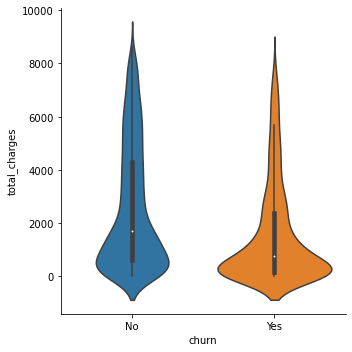

In [9]:
#Look at total charges
sns.catplot(data=tr_eda,x='churn',y='total_charges',kind='violin')

**Notes:**
Those that didn't churn seem to have higher total charges than those that didn't.  It's also worth noting that there seems to be a large concentration of people who churned with very low total charges.  This information is all likely related to tenure though, as total charges is a function of that.

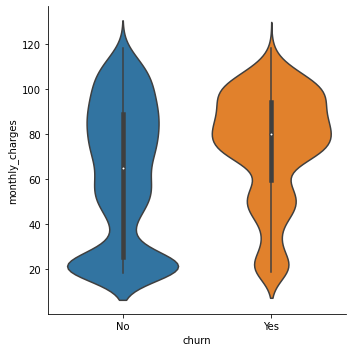

In [10]:
#Look at monthly charges
sns.catplot(data=tr_eda,x='churn',y='monthly_charges',kind='violin')

In [11]:
ch_mean = tr_eda[tr_eda.churn=='Yes'].monthly_charges.mean()
st_mean = tr_eda[tr_eda.churn=='No'].monthly_charges.mean()

print(f'Those who churned have an average monthly charge of {ch_mean}')
print(f'Those who did not churn have an average monthly charge of {st_mean}')

Those who churned have an average monthly charge of 74.9560733384263
Those who did not churn have an average monthly charge of 61.86513977304166


**Notes:** This shows that those who churned on average have a higher monthly bill than those that didn't.  Specifically, they paid an additional 13 dollars on average per month.  It's also worth noting there is a large number of people who churned with monthly_charges between 80-100 dollars.  There is also a large number of people who did not churn that had monthly charges of 20 dollars

<AxesSubplot:xlabel='tenure', ylabel='Count'>

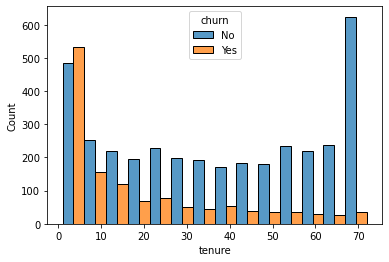

In [12]:
#look at tenure
sns.histplot(data=tr_eda,x='tenure',hue='churn',multiple='dodge')

**Notes:** This shows that we have much higher churn rates with newer customers than well established customers

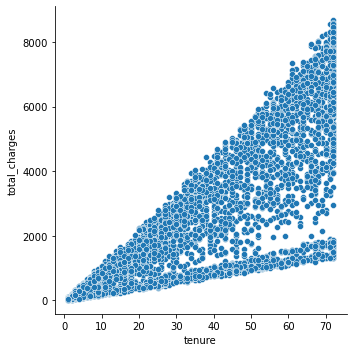

In [13]:
#quick visual check to confirm if some sort of correlation b/w tenure and total charges
sns.relplot(data=tr_eda,x='tenure',y='total_charges')

##### looking at the categorical data

In [14]:
tr_eda_cat = tr_eda.drop(columns=['tenure','monthly_charges','total_charges'])
tr_eda_cat.shape

(4922, 17)

<AxesSubplot:xlabel='payment_type', ylabel='Count'>

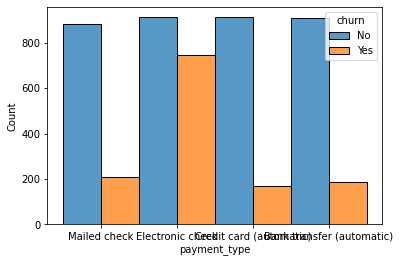

In [15]:
#plot test
sns.histplot(data=tr_eda_cat,x='payment_type',hue='churn',multiple='dodge')

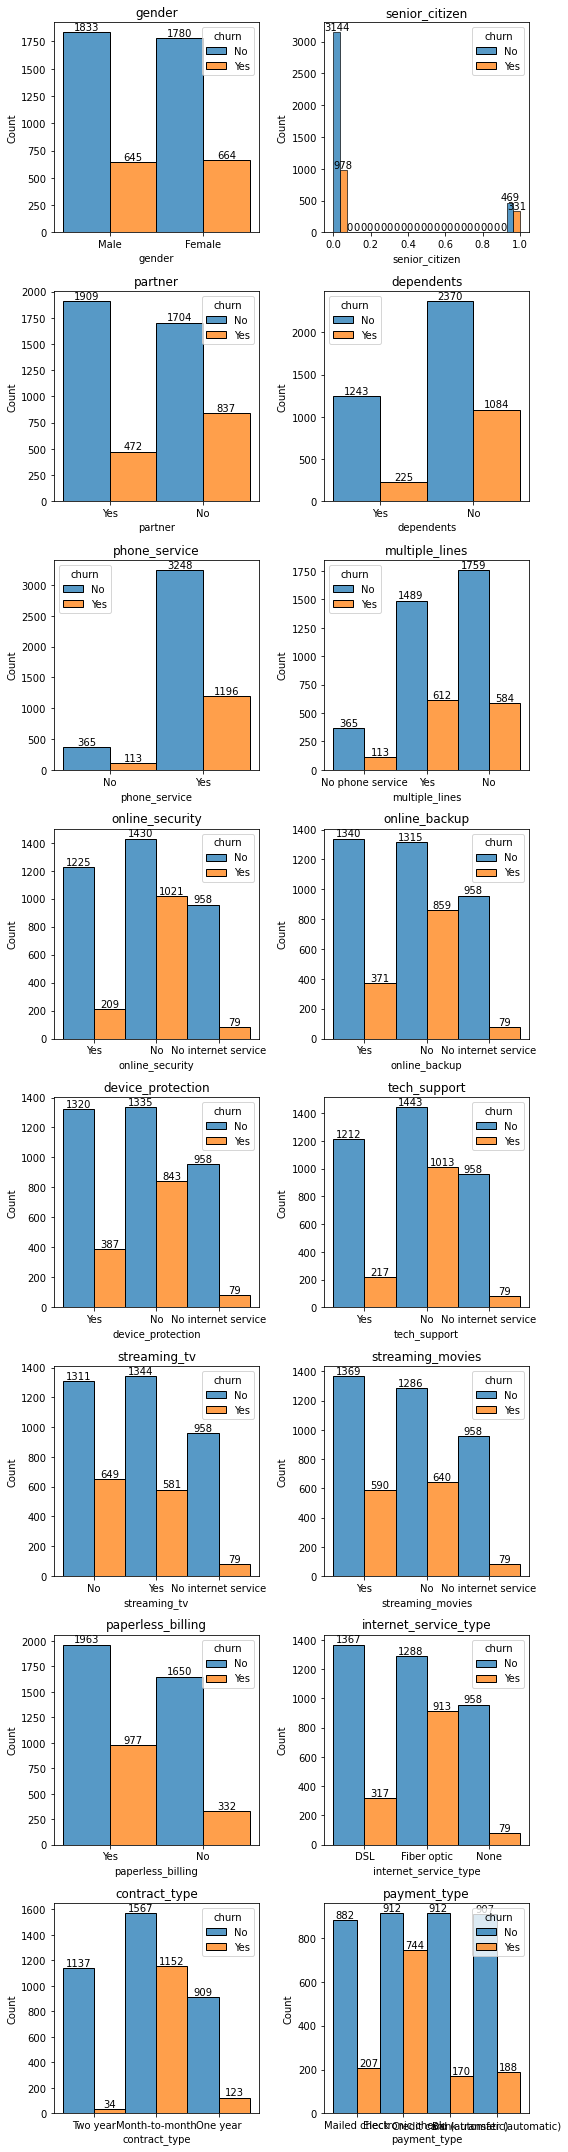

In [16]:
plt.figure(figsize=(8,30))
ct = 0
for i in tr_eda_cat.columns:
    if i == 'churn': continue
    else:
        ct += 1
        plt.subplot(8,2,ct)
        ax = sns.histplot(data=tr_eda_cat,x=i,hue='churn',multiple='dodge')
        #display values
        for container in ax.containers:
            ax.bar_label(container)
        plt.title(i)
    
plt.tight_layout()

**Notes:**
- Little difference b/w target for the categories:
  - Gender
  - phone service
  - multiple_lines (slightly higher churn for Yes)
  - Streaming_tv
  - streaming_movies 
- **To investigate further:**
  - senior_citizen has a higher churn rate
  - Both 'no' partners and 'no' dependents have higher churn rates (independently)
  - online_security, online_backup, tech_support, device_protection all have a much higher churn rate if 'no'
    - May correspond to some kind of package, or may relate to the internet type
  - paperless_billing has higher churn rate
    - May be also related to payment type
  - internet_service_type of Fiber Optic has much higher churn rate
  - contract_type of month to month has much higher churn rate
  - payment_type of electronic check has a much higher churn rate

##### Test for interdependence

In [17]:
#Doing chi squared tests between churn and the other cats above
cols = ['senior_citizen','partner','dependents','paperless_billing','internet_service_type','contract_type','payment_type','online_security','online_backup','tech_support','device_protection']

In [18]:
obs = pd.crosstab(tr_eda.payment_type,tr_eda.churn)
obs

churn,No,Yes
payment_type,,
Bank transfer (automatic),907,188
Credit card (automatic),912,170
Electronic check,912,744
Mailed check,882,207


In [19]:
#use an alpha of .05, want 95% confidence
α = .05

#loop over the columns we wanted to check for interdependence on
for i in cols:
    #set null hypothesis
    null_h= f'{i} and whether the customer churns are independent of each other'
    #create table of observed values
    obs = pd.crosstab(tr_eda[i],tr_eda.churn)
    #run chi^2 test
    chi2, p = stats.chi2_contingency(obs)[0:2]
    
    #pretty print the results
    utils.stats_result(p,null_h,alpha=α,chi2=chi2)


The null hypothesis was: senior_citizen and whether the customer churns are independent of each other
We reject the null hypothesis, p = 7.402166430209844e-25 | α = 0.05
  chi2: 105.99231624802549

The null hypothesis was: partner and whether the customer churns are independent of each other
We reject the null hypothesis, p = 3.2064738315306907e-25 | α = 0.05
  chi2: 107.650274710196

The null hypothesis was: dependents and whether the customer churns are independent of each other
We reject the null hypothesis, p = 2.9383669032084807e-31 | α = 0.05
  chi2: 135.2314717145625

The null hypothesis was: paperless_billing and whether the customer churns are independent of each other
We reject the null hypothesis, p = 1.6151316518802027e-37 | α = 0.05
  chi2: 163.8697851245384

The null hypothesis was: internet_service_type and whether the customer churns are independent of each other
We reject the null hypothesis, p = 7.906836484588637e-108 | α = 0.05
  chi2: 493.2229245606228

The null hy

These Chi Squared tests support the initial visual indication that there is a relationship between the above categories and churn

### Multivariate Stats (more than 2 variables): 
Ask additional questions of the data, such as how subgroups compare to each-other and to the overall population. Answer questions using visualizations and/or hypothesis testing.
- If you're using seaborn's relplot or catplot, use the hue or col arguments to add extra dimension(s) to the visuals.
- Using sns.pairplot with hue may be helpful. With too many columns, however, it can produce visuals that are too noisy to be useful.
- See https://seaborn.pydata.org/tutorial/axis_grids.html for more multivariate options

**Things I want to look at:**
- how monthly charges, tenure and churn relate
- how internet type and contract look
- how payment type and contract look


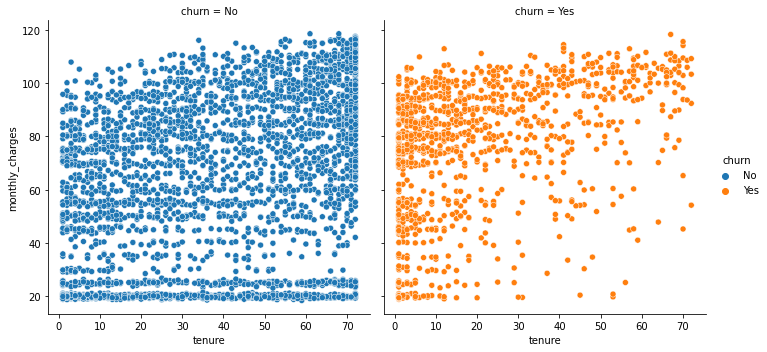

In [30]:
#Looking at tenure and monthly charges, split by churn
sns.relplot(data=tr_eda,x='tenure',y='monthly_charges',col='churn',hue='churn')

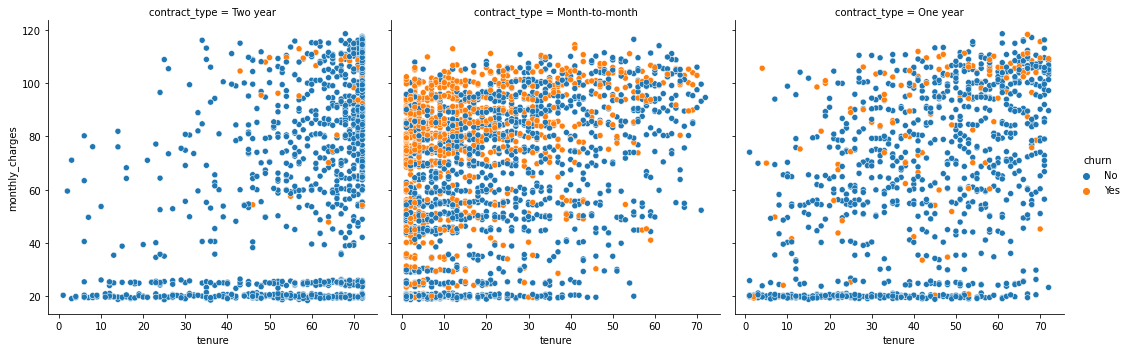

In [21]:
#Look at tenure and monthly charges, color by churn and subset by contract type
sns.relplot(data=tr_eda,x='tenure',y='monthly_charges',hue='churn',col='contract_type')

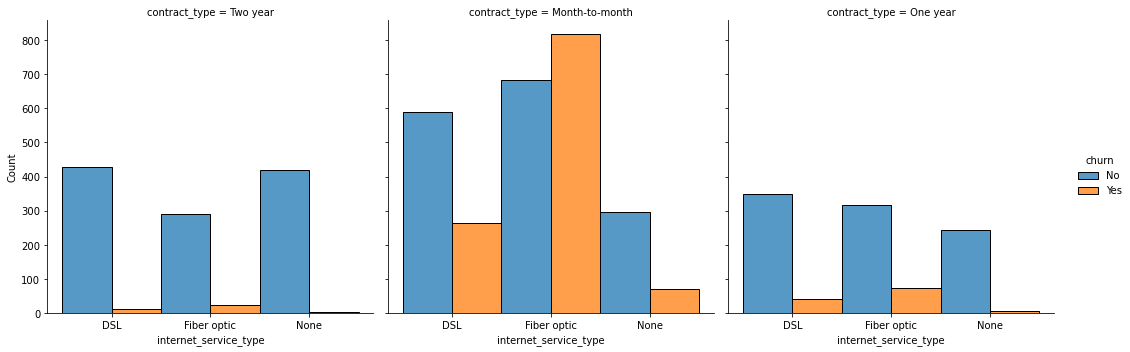

In [35]:
#internet type and contract type
sns.displot(data=tr_eda,x='internet_service_type',hue='churn',col='contract_type',multiple='dodge')

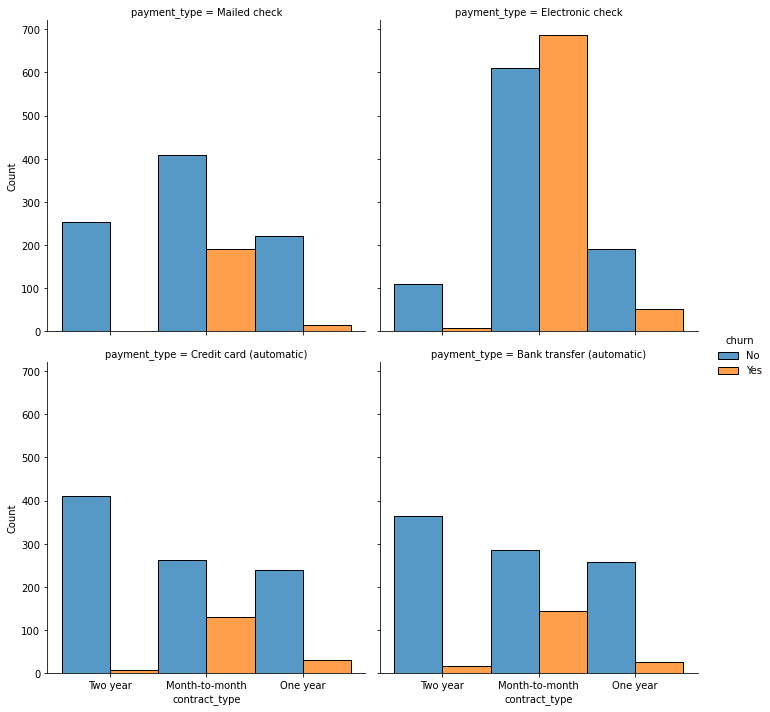

In [40]:
#payment type and contract type
sns.displot(data=tr_eda,x='contract_type',hue='churn',col='payment_type',col_wrap=2,multiple='dodge')

In [42]:
pd.crosstab(tr_eda.internet_service_type,tr_eda.payment_type)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
internet_service_type,,,,
DSL,399,424,448,413
Fiber optic,464,425,1127,185
None,232,233,81,491


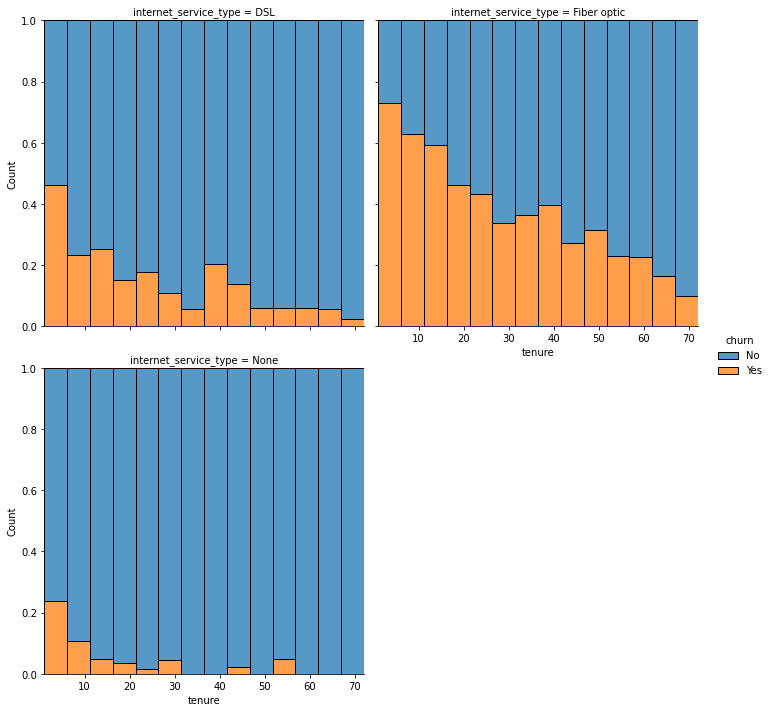

In [46]:
#look at how churn rate changes by internet service type
sns.displot(data=tr_eda,x='tenure',hue='churn',multiple='fill',col='internet_service_type',col_wrap=2)

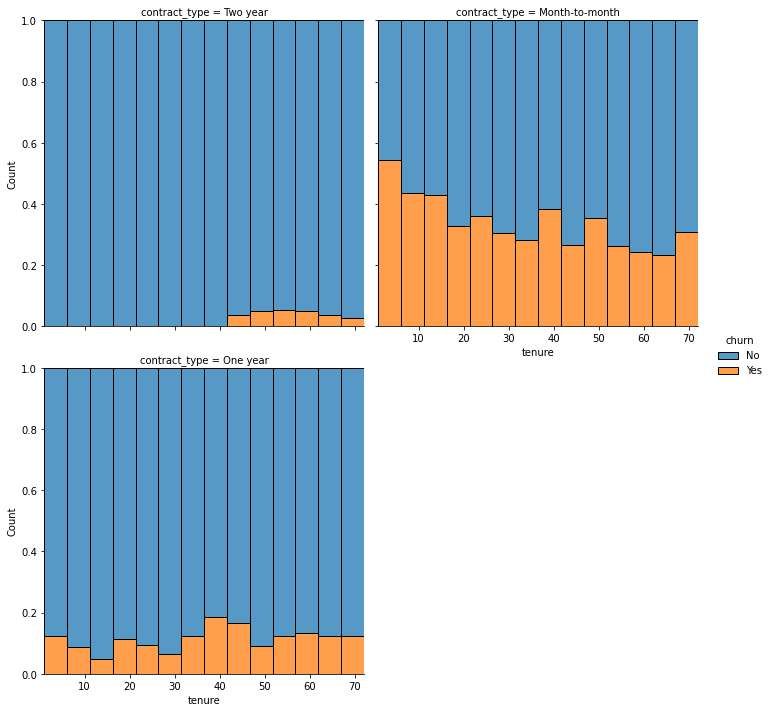

In [47]:
#look at how churn rate changes by contract type and tenure
sns.displot(data=tr_eda,x='tenure',hue='churn',multiple='fill',col='contract_type',col_wrap=2)

**NOTE** Month to month contracts have a high churn rate regardless of tenure (though it does decrease over time).
Fiber optic customers have a higher churn rate at low tenures, and it decreases quite a bit with increased tenure.

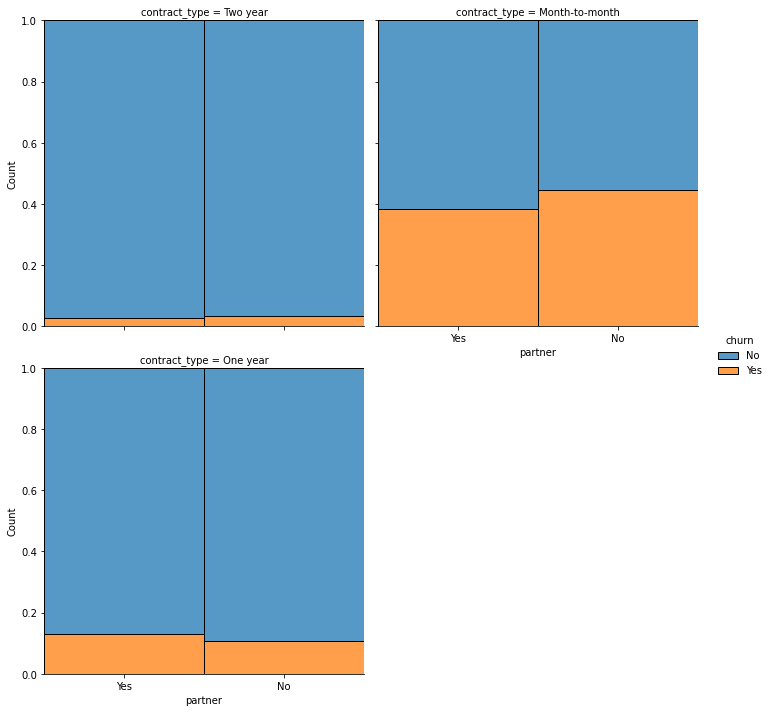

In [55]:
#see churn on contract type broken out by whether they have partners
sns.displot(data=tr_eda,x='partner',hue='churn',col='contract_type',col_wrap=2,multiple='fill')

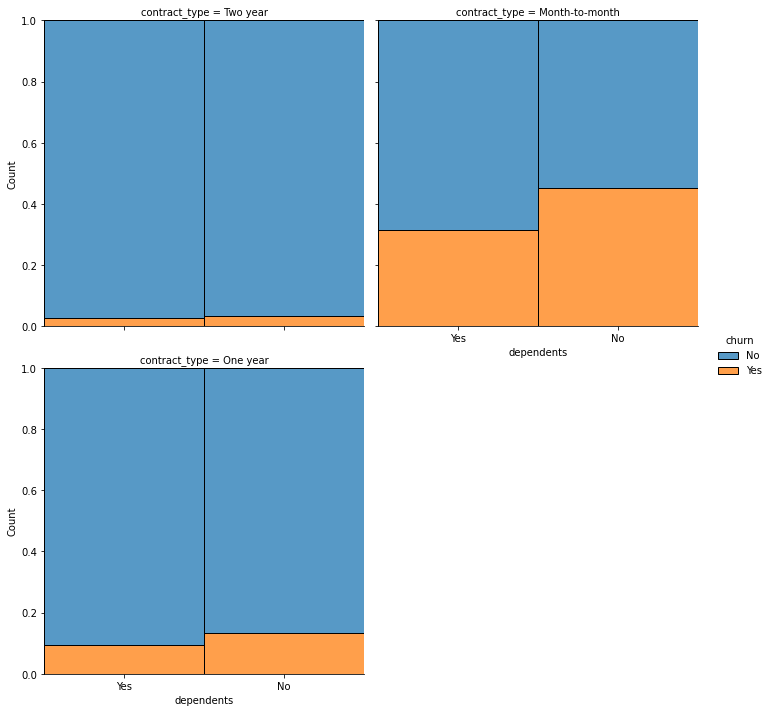

In [53]:
#see churn on contract type broken out by whether they have dependents
sns.displot(data=tr_eda,x='dependents',hue='churn',col='contract_type',col_wrap=2,multiple='fill')

Not having dependents results in higher churning across all contract types, but that's not the case for not having partners

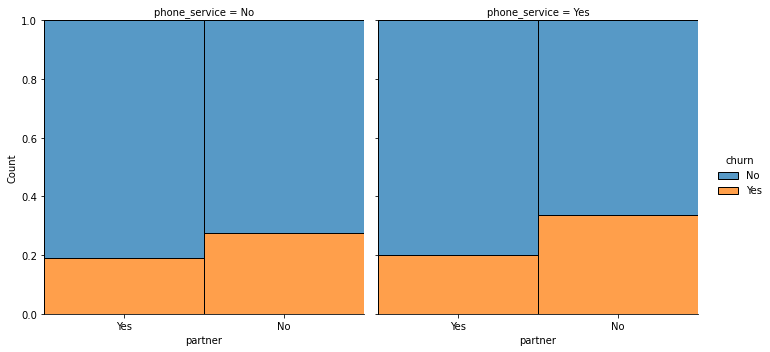

In [60]:
#see churn on contract type broken out by whether they have dependents
sns.displot(data=tr_eda,x='partner',hue='churn',col='phone_service',col_wrap=2,multiple='fill')